# Chapter 8. Tests of Means of Numerical Data

This chapter covers hypothesis tests for the mean values of groups, and shows how to implement each of these tests in Python:

- Comparison of one group with a fixed value.
- Comparison of two groups with respect to each other.
- Comparison of three or more groups with each other.

## 8.1 Distribution of a Sample Mean

### 8.1.1 One Sample t-Test for a Mean Value

- To check the mean value of normally distributed data against a reference value, we typically use the one sample t-test, which is based on the t-distribution

#### Example

- As an example we take **100 normally distributed data**, with a **mean of 7** and with a **standard deviation of 3**.

- What is the chance of finding a mean value at a distance of 0.5 or more from the mean?

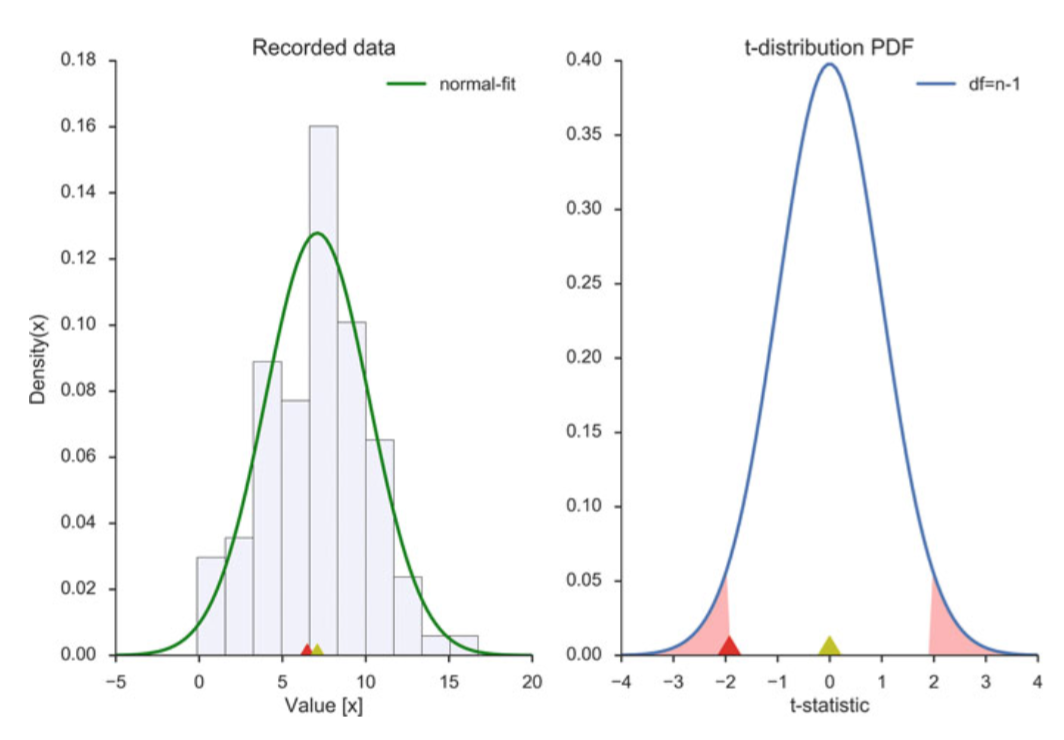

In [1]:
from IPython.display import Image
Image("./fig/One_t_test.png")

- 모집단 평균은 7 (노란색 triangle), 표준편차는 3
- 모집단으로부터 100번 random sampling 했을때, 표본평균은 7.10, 표본의 표준편차는 3.12, 표본평균의 표준오차는 0.312가 나왔다고 하자
- 표본 평균의 분포가 t-분포를 따른다고 했을 때, t-분포의 넓이는 평균의 표준오차와 같다.
- 문제로 돌아가서, 평균이 6.5 (빨간색 triangle)가 나올 확률은 t-분포에서 6.5가 위치한 지역의 CDF값을 구하면 된다.
- One-tailed t-test / Two-tailed t-test

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import urllib

inFile = 'altman_91.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = np.genfromtxt(urllib.request.urlopen(url), delimiter = ',')
data

array([ 5260.,  5470.,  5640.,  6180.,  6390.,  6515.,  6805.,  7515.,
        7515.,  8230.,  8770.])

In [2]:
M = np.mean(data)
SD = np.std(data)
print(('Mean and SD : {0:4.2f} and {1:4.2f}'.format(M, SD)))

Mean and SD : 6753.64 and 1088.97


In [8]:
# 7725가 평균이 될 가능성?
t, pval = stats.ttest_1samp(data, 7725)
print(t, pval)

-2.82075406083 0.0181372351761


### 8.1.2 Wilcoxon Signed Rank Sum Test

- **If the data are not normally distributed**, the one-sample t-test should not be used. Instead, we **must use a nonparametric test** on the mean value. We can do this by performing a Wilcoxon signed rank sum test

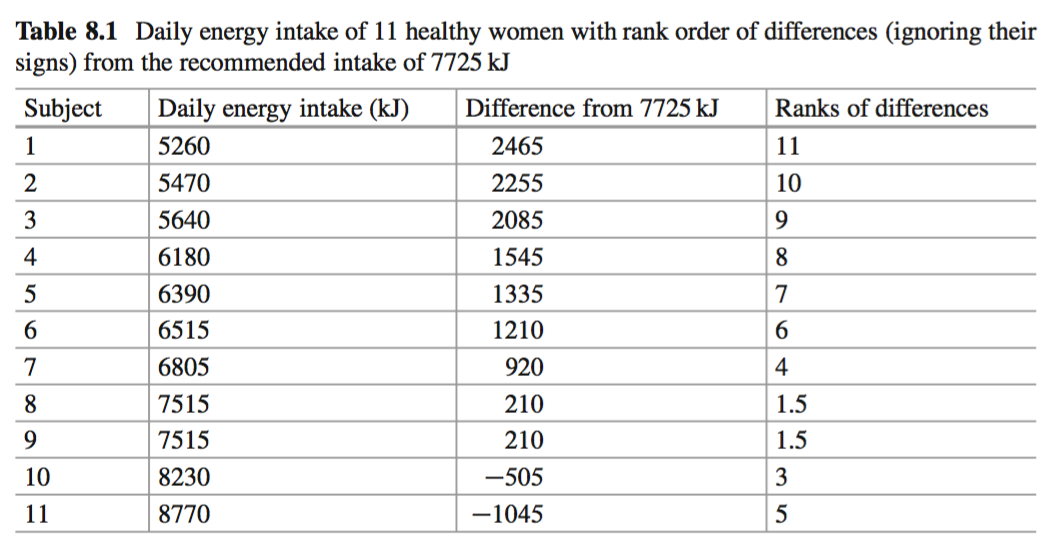

In [9]:
Image("./fig/Wilcoxon_table.png")

In [3]:
- 기준값과 차이의 절대값이 작은 순서대로 Rank를 매김.
- negative 또는 positive에 해당하는 수를 합함.


SyntaxError: invalid syntax (<ipython-input-3-2de4a7145a40>, line 1)

In [12]:
stats.wilcoxon(data - 7725)

WilcoxonResult(statistic=8.0, pvalue=0.026157182329284684)

----

## 8.2 Comparison of Two Groups

### 8.2.1 Paired t-Test

- In the comparison of two groups with each other, **two cases have to be distinguished**. In the first case, two values recorded from the **same subject at different times** are compared to each other. For example, the size of students when they enter primary school and after their first year, to check if they have grown. Since we are only interested in the difference in each subject between the first and the second measurement, this test is called paired t-test, and is essentially equivalent to a one- sample t-test for the mean difference

In [13]:
import numpy as np
from scipy import stats

np.random.seed(1234)
data = np.random.randn(10) + 0.1
data1 = np.random.randn(10)*5
data2 = data1 + data

In [14]:
stats.ttest_1samp(data, 0)

Ttest_1sampResult(statistic=-0.12458492298731401, pvalue=0.90359045085470857)

In [15]:
stats.ttest_rel(data2, data1)

Ttest_relResult(statistic=-0.1245849229873135, pvalue=0.9035904508547089)

In [4]:
import numpy as np
from scipy import stats
import urllib

inFile = 'altman_93.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = np.genfromtxt(urllib.request.urlopen(url), delimiter = ',')
data

array([[ 5260.,  3910.],
       [ 5470.,  4220.],
       [ 5640.,  3885.],
       [ 6180.,  5160.],
       [ 6390.,  5645.],
       [ 6515.,  4680.],
       [ 6805.,  5265.],
       [ 7515.,  5975.],
       [ 7515.,  6790.],
       [ 8230.,  6900.],
       [ 8770.,  7335.]])

In [5]:
np.mean(data, axis=0)

array([ 6753.63636364,  5433.18181818])

In [6]:
np.std(data, axis=0, ddof=1) #ddof = degree of freedom (default = 0)

array([ 1142.12322214,  1216.83251257])

In [33]:
pre = data[:,0]
post = data[:,1]
# paired t-test
t_statistic, p_value = stats.ttest_1samp(post - pre, 0)
print(("paired t-test", p_value))

# wilcoxon
rankSums, p_value = stats.wilcoxon(post- pre)
print(("Wilcoxon-Signed-Rank-Sum test", p_value))


('paired t-test', 3.0590209429348752e-07)
('Wilcoxon-Signed-Rank-Sum test', 0.0033300139117459797)


### 8.2.2 t-Test between Independent Groups

- An unpaired t-test, or t-test for two independent groups, compares two groups
- The basic idea is the same as for the one-sample t-test. But instead of the variance of the mean, we now need the **variance of the difference between the means of the two groups**

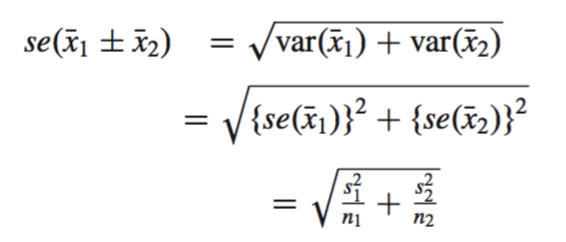

In [16]:
Image("./fig/SE_two_group_ttest.png")

In [7]:
import numpy as np
from scipy import stats
import urllib

inFile = 'altman_94.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
energ = np.genfromtxt(urllib.request.urlopen(url), delimiter = ',')
energ

array([[  9.21,   0.  ],
       [  7.53,   1.  ],
       [  7.48,   1.  ],
       [  8.08,   1.  ],
       [  8.09,   1.  ],
       [ 10.15,   1.  ],
       [  8.4 ,   1.  ],
       [ 10.88,   1.  ],
       [  6.13,   1.  ],
       [  7.9 ,   1.  ],
       [ 11.51,   0.  ],
       [ 12.79,   0.  ],
       [  7.05,   1.  ],
       [ 11.85,   0.  ],
       [  9.97,   0.  ],
       [  7.48,   1.  ],
       [  8.79,   0.  ],
       [  9.69,   0.  ],
       [  9.68,   0.  ],
       [  7.58,   1.  ],
       [  9.19,   0.  ],
       [  8.11,   1.  ]])

In [38]:
energ = np.asarray(inFile)

# Grouping
group1 = energ[:,1] == 0
group1

array([ True, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True, False], dtype=bool)

In [39]:
group1 = energ[group1][:,0]
group1

array([  9.21,  11.51,  12.79,  11.85,   9.97,   8.79,   9.69,   9.68,
         9.19])

In [41]:
group2 = energ[:,1] == 1
group2 = energ[group2][:,0]
group2

array([  7.53,   7.48,   8.08,   8.09,  10.15,   8.4 ,  10.88,   6.13,
         7.9 ,   7.05,   7.48,   7.58,   8.11])

In [42]:
print(np.mean(group1), np.mean(group2))

10.2977777778 8.06615384615


In [43]:
# two-sample t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)
print(("two-sample t-test", p_value))

('two-sample t-test', 0.00079899821117005929)


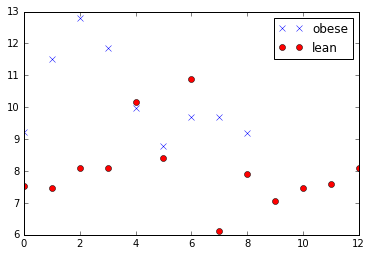

In [45]:
import matplotlib.pyplot as plt
plt.plot(group1, 'bx', label = 'obese')
plt.hold(True)
plt.plot(group2, 'ro', label = 'lean')
plt.legend(loc = 0)
plt.show()

### 8.2.3 Nonparametric Comparison of Two Groups: Mann–Whitney Test

- If the measurement values from two groups are not normally distributed we have to resort to a nonparametric test. The most common nonparametric test for the comparison of two independent groups is the Mann–Whitney(–Wilcoxon) test. 

- Watch out, because this test is sometimes also referred to as **Wilcoxon rank-sum test**. This is different from the Wilcoxon signed rank sum test!

In [48]:
u, p_value = stats.mannwhitneyu(group1, group2, alternative = 'two-sided')

In [50]:
print(u, p_value)

105.0 0.00212161338588


- 참고 : http://blog.naver.com/istech7/50152096673

### 8.2.4 Statistical Hypothesis Tests vs Statistical Modeling

#### a) Classical t-Test

In [8]:
import numpy as np
from scipy import stats

# Generate the data
np.random.seed(123)
race_1 = np.round(np.random.randn(20) * 10 + 90)
race_2 = np.round(np.random.randn(20) * 10 + 85)

# t-test
(t, pval) = stats.ttest_rel(race_1, race_2)

print('The probability that the two distributions '
     'are equal is {0:5.3f} .'.format(pval))

The probability that the two distributions are equal is 0.033 .


#### b) Statistical Modeling

In [9]:
import pandas as pd
import statsmodels.formula.api as sm

np.random.seed(123)
df = pd.DataFrame({'Race1': race_1, 'Race2' : race_2})

In [10]:
df

,Race1,Race2
0,79.0,92.0
1,100.0,100.0
2,93.0,76.0
3,75.0,97.0
4,84.0,72.0
5,107.0,79.0
6,66.0,94.0
7,86.0,71.0
8,103.0,84.0
9,81.0,76.0


In [63]:
'''
OLS = ordinary least square
'''

result = sm.ols(formula = 'I(Race2 - Race1) ~ 1', data = df).fit() # why 1?
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       I(Race2 - Race1)   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Sat, 08 Oct 2016   Prob (F-statistic):                nan
Time:                        13:30:56   Log-Likelihood:                -85.296
No. Observations:                  20   AIC:                             172.6
Df Residuals:                      19   BIC:                             173.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -9.1000      3.950     -2.304      0.0

----

## 8.3 Comparison of Multiple Groups

### 8.3.1 Analysis of Variance (ANOVA)

#### a) Principle

- The idea behind the Analysis of Variance (ANOVA) is to divide the variance into the **variance between groups**, and that **within groups**, and see **if those distributions match the null hypothesis that all groups come from the same distribution**

-  If we compare a group with No treatment, another with treatment A, and a third with treatment B, then we perform a one factor ANOVA, sometimes also called **one-way ANOVA, with treatment the one analysis factor**.

- If we do the same test with men and with women, then we have a two-factor or **two-way ANOVA, with gender and treatment as the two treatment factors**

- 그룹 간 분산과 그룹 내 분산의 비율에 따른 분포(F 분포)를 가지고 영가설 검정.
- 가정 : 모든 샘플(그룹)이 등분산 정규분포를 나타냄 (Levene test)

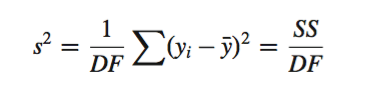

In [74]:
# Sample variance
Image("./fig/Anova_SV.png")

- DF = Degree of freedom, SS = Sum of Squares

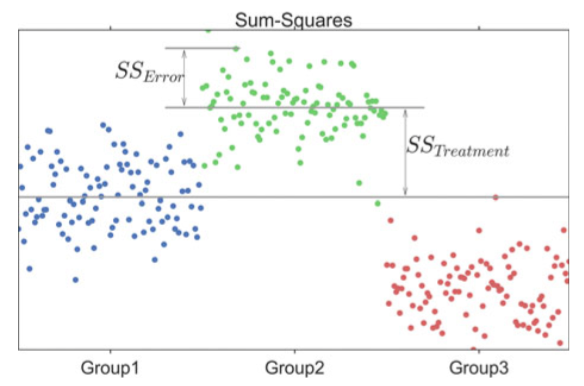

In [75]:
Image("./fig/anova_SS.png")

- S^2(SST)와 S^2(SSE)의 비율은 F분포를 따름

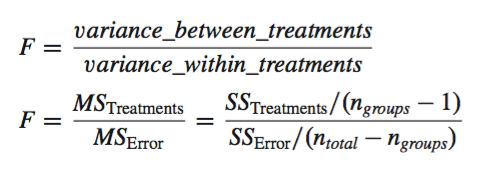

In [77]:
Image("./fig/anova_F.png")

#### b) Example: One-Way ANOVA

- Twenty-two patients undergoing cardiac bypass surgery were randomized to one of three ventilation groups:

>- Group I: Patients received 50% nitrous oxide and 50% oxygen mixture continuously for 24 h.

>- Group II: Patients received a 50% nitrous oxide and 50% oxygen mixture only dirng the operation.

>- Group III: Patients received no nitrous oxide but received 35-50% oxygen for 24 h.

- The data show red cell folate levels for the three groups after 24h' ventilation.

In [67]:
# Get data
import numpy as np
import urllib
inFile = 'altman_910.txt'
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'

url_base = url + inFile
data = np.genfromtxt(urllib.request.urlopen(url_base), delimiter = ",")

In [68]:
data

array([[ 243.,    1.],
       [ 251.,    1.],
       [ 275.,    1.],
       [ 291.,    1.],
       [ 347.,    1.],
       [ 354.,    1.],
       [ 380.,    1.],
       [ 392.,    1.],
       [ 206.,    2.],
       [ 210.,    2.],
       [ 226.,    2.],
       [ 249.,    2.],
       [ 255.,    2.],
       [ 273.,    2.],
       [ 285.,    2.],
       [ 295.,    2.],
       [ 309.,    2.],
       [ 241.,    3.],
       [ 258.,    3.],
       [ 270.,    3.],
       [ 293.,    3.],
       [ 328.,    3.]])

In [69]:
# Sort them into groups, according to column 1
group1 = data[data[:,1] == 1, 0]
group2 = data[data[:,1] == 2, 0]
group3 = data[data[:,1] == 3, 0]

In [70]:
group1

array([ 243.,  251.,  275.,  291.,  347.,  354.,  380.,  392.])

In [76]:
# Levene test (등분산 검정)
stats.levene(group1, group2, group3)

LeveneResult(statistic=3.6413030860271558, pvalue=0.045846812634186246)

In [71]:
from scipy import stats
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=3.7113359882669763, pvalue=0.043589334959178244)

In [72]:
# A more detailed output of the ANOVA is provided by the implementation in statsmodels

import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame(data, columns = ['value', 'treatment'])
model = ols('value ~ C(treatment)', df).fit()
anovaResults = anova_lm(model)
print(anovaResults)

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


### 8.3.2 Multiple Comparisons

- one-way anova의 영가설 : 모든 샘플의 평균은 같다
- 다중비교 : n개의 처리(n개의 그룹) 중에서 두 개씩의 처리 조합을 생각하여 처리 조합별 효과 차이의 유무를 검토하는 것 (각 평균들간의 비교) = post hoc ("after this")    

>• Tukey HSD

>• Bonferroni correction

>• Holms correction

>• ::: and others :::


#### a) Tukey’s Test

- Tukey Honest Significant Difference test (HSD) method
- controls for the Type I error rate across multiple comparisons

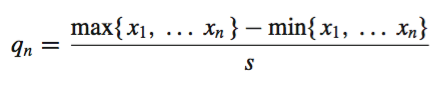

In [79]:
Image("./fig/Tukey.png")

In [86]:
import numpy as np
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
res = pairwise_tukeyhsd(data[:,0], data[:,1])
res.summary()

group1,group2,meandiff,lower,upper,reject
1.0,2.0,-60.1806,-116.6056,-3.7555,True
1.0,3.0,-38.625,-104.8246,27.5746,False
2.0,3.0,21.5556,-43.2141,86.3252,False


#### b) Bonferroni Correction

- If you perform four comparisons, you check for significance not at p = 0.05, but at p = 0.05/4 = 0.0125.

In [91]:
from statsmodels.sandbox.stats.multicomp import multipletests
multipletests([.05, 0.3, 0.01], method = 'bonferroni')

(array([False, False,  True], dtype=bool),
 array([ 0.15,  0.9 ,  0.03]),
 0.016952427508441503,
 0.016666666666666666)

#### c) Holm Correction

- Holm–Bonferroni method
- if you have three groups (and thus three comparisons), this means that the first p-value is tested at the 0.05/3 level (0.017), the second at the 0.05/2 level (0.025), and third at the 0.05/1 level (0.05)

### 8.3.3 Kruskal–Wallis Test

- For three or more groups, the test for normally distributed data is the ANOVA-test; for not- normally distributed data, the corresponding test is the Kruskal–Wallis test

- When the null hypothesis is true the test statistic for the Kruskal–Wallis test follows the **chi-square distribution**.

### 8.3.4 Two-Way ANOVA

In [99]:
import numpy as np
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [100]:
inFile = 'altman_12_6.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')
df = pd.DataFrame(data, columns=['hs', 'fetus', 'observer'])
df

,hs,fetus,observer
0,14.3,1.0,1.0
1,14.0,1.0,1.0
2,14.8,1.0,1.0
3,13.6,1.0,2.0
4,13.6,1.0,2.0
5,13.8,1.0,2.0
6,13.9,1.0,3.0
7,13.7,1.0,3.0
8,13.8,1.0,3.0
9,13.8,1.0,4.0


In [101]:
# Anova
formula = 'hs ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = ols(formula, df).fit()
print(anova_lm(lm))

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN
